In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
import numpy as np

In [56]:
# Generator network
def create_generator(noise_dim):
    gen_model= Sequential()
    gen_model.add(Dense(128, input_dim=noise_dim, activation='relu'))
    gen_model.add(Dense(784, activation='sigmoid'))  # 28*28 = 784 for MNIST
    gen_model.add(Reshape((28,28,1)))
    return gen_model

# Discriminator network
def create_discriminator(image_shape):
    disc_model = Sequential()
    disc_model.add(Flatten(input_shape=image_shape))
    disc_model.add(Dense(128, activation='relu'))
    disc_model.add(Dense(1, activation='sigmoid'))  # Binary classification
    return disc_model

In [57]:
# set hyperparameters
noise_dim = 100
image_shape = (28, 28, 1)

# initialize gan components
discriminator_net = create_discriminator(image_shape)
discriminator_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
generator_net = create_generator(noise_dim)
noise_input = tf.keras.Input(shape=(noise_dim,))
generated_image = generator_net(noise_input)
discriminator_net.trainable = False
validity_output = discriminator_net(generated_image)


In [58]:
gan_model = tf.keras.Model(noise_input, validity_output)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

In [59]:
# Training loop
def train_gan_model(gan_model, generator_net, discriminator_net, num_epochs, batch_size, noise_dim):
    (train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
    train_images = train_images / 255.0
    train_images = np.expand_dims(train_images, axis=1)  
    
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train discriminator on real and fake images
        idx = np.random.randint(0, train_images.shape[0], batch_size)
        real_images = train_images[idx]

        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        generated_images = generator_net.predict(noise)

        d_loss_real = discriminator_net.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator_net.train_on_batch(generated_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        g_loss = gan_model.train_on_batch(noise, real_labels)

        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
        
    
    train_gan_model(gan_model, generator_net, discriminator_net, num_epochs=100000, batch_size=64, noise_dim=noise_dim)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


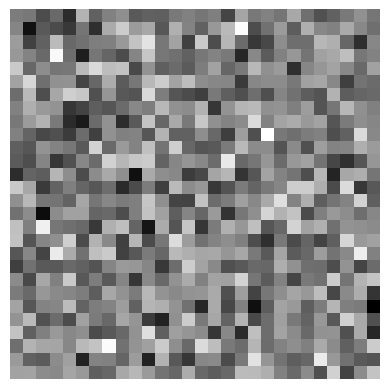

In [60]:
z = np.random.normal(0, 1, (10, noise_dim))

# Generate images
generated_images = generator_net.predict(z)

# Plot the first generated image
plt.imshow(generated_images[0, :, :, 0], cmap='gray')  # Fixed plt.imshow and cmap
plt.axis('off')
plt.show()